<a href="https://colab.research.google.com/github/souradipta93/DS_Projects_P_1/blob/master/Logit_PaulGreenBooksByMail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Logistic Regression-Books By Mail-Paul Green

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Suppress warning messages
import warnings
warnings.filterwarnings("ignore")

In [4]:
mytraindata=pd.read_csv("PaulBooks1.csv")
mytraindata.head()

,ID,Months,NoBought,Purchase
0,1001,24,0,0
1,1002,16,0,0
2,1003,15,0,0
3,1004,22,0,0
4,1005,15,0,1


In [5]:
#Remove redundant columns
mytraindata.drop(['ID'], axis=1, inplace=True)
 

In [6]:
# Calculate baseline proportion of Y variable
mytraindata['Purchase'].value_counts()

0    917
1     83
Name: Purchase, dtype: int64

### Exploratory data analysis

### Model building

In [7]:
#Define X and Y variables
X = mytraindata.drop('Purchase', axis=1)
Y = mytraindata[['Purchase']]

In [8]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(Y.astype(float), sm.add_constant(X.astype(float)))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.251466
         Iterations 7


In [9]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:               Purchase   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Mar 2021   Pseudo R-squ.:                  0.1209
Time:                        17:12:43   Log-Likelihood:                -251.47
converged:                       True   LL-Null:                       -286.04
Covariance Type:            nonrobust   LLR p-value:                 9.698e-16
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2256      0.239     -9.315      0.000      -2.694      -1.757
Months        -0.0707      0.019     -3.677      0.000      -0.108      -0.033
NoBought       0.9891      0.135      7.345      0.0

### Step1 - overall significance of the model

In [10]:
#P-value of the overall model
lg.llr_pvalue

9.697631422882317e-16

### Step2 - Interpreting McFadden R2

In [11]:
#Calculating gain
Gain = lg.llf-lg.llnull
G2Stat = Gain *2

print("Gain =",Gain, "G2Stat =",G2Stat)

Gain = 34.569479815420976 G2Stat = 69.13895963084195


In [12]:
#Calculating McFadden R2
McFaddenR2 = 1-(lg.llf/lg.llnull)
print("McFaddenR2 = ", McFaddenR2)

McFaddenR2 =  0.12085711265126431


### Step3 - Individual coefficient significance

In [13]:
# Individual coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.4f}'.format
lgcoef

,coef,pval
const,-2.2256,0.0000
Months,-0.0707,0.0002
NoBought,0.9891,0.0000


### Step4 - Calculate and interpret Odds Ratio & probability

In [14]:
#Exponential of coef to get odds ratio
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)

#Probability from Odds ratio
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])

#Sort dataframe by decreasing Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
lgcoef

,coef,pval,Odds_ratio,probability
NoBought,0.9891,0.0000,2.6887,0.7289
Months,-0.0707,0.0002,0.9317,0.4823
const,-2.2256,0.0000,0.1080,0.0975


### Step5 - Make the prediction

In [15]:
#Compute class from predicted probability
X=sm.add_constant(X)
pred_prob=lg.predict(X)
pred_class = (pred_prob>0.5).astype(np.int)
pred_class

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64

### Step6 - Model performance measure

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

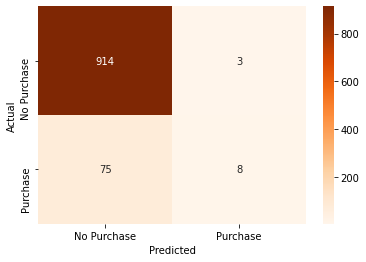

In [17]:
#Confusion matrix
confusion=confusion_matrix(Y, pred_class)
sns.heatmap(confusion,annot=True, fmt=".0f",cmap=("Oranges"),
           xticklabels=["No Purchase", "Purchase"],
           yticklabels=["No Purchase", "Purchase"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [18]:
#Accuracy, recall, precision
accuracy = round(accuracy_score(Y.astype(float), pred_class),2)
recall = round(recall_score(Y.astype(float), pred_class),2)
precision = round(precision_score(Y.astype(float), pred_class),2)

print("accuracy: ",accuracy)
print("recall: ",recall)
print("precision: ",precision)

accuracy:  0.92
recall:  0.1
precision:  0.73


### Step7 - ROC curve and AUC

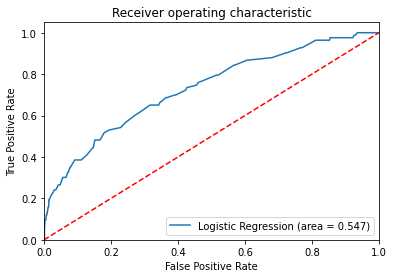

In [19]:
# ROC curve and AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y.astype(float), pred_class)
fpr, tpr, thresholds = roc_curve(Y.astype(float), pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [22]:
# Read the csv file test data
mytestdata=pd.read_csv("PaulBooks2.csv")
mytestdata.head() 

 

,ID,Months,NoBought,Purchase
0,2001,30,0,0
1,2002,12,0,0
2,2003,18,0,0
3,2004,27,1,0
4,2005,4,1,0


In [23]:
#Remove redundant columns
X2=mytestdata[['Months','NoBought']]
X2
Y2=mytestdata['Purchase']

In [24]:
#Predict probability
predtest_prob =lg.predict(sm.add_constant(X2))
predtest_prob

0     0.0128
1     0.0442
2     0.0294
3     0.0413
4     0.1795
       ...  
995   0.1332
996   0.0541
997   0.0385
998   0.1596
999   0.0506
Length: 1000, dtype: float64

In [25]:
#Compute class from predicted probability
predtest_class = (predtest_prob>0.5).astype(np.int)
predtest_class

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64

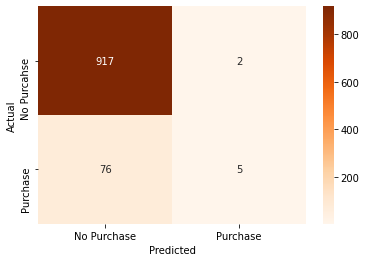

In [26]:
#Confusion matrix
confusion=confusion_matrix(Y2, predtest_class)
sns.heatmap(confusion,annot=True,fmt=".0f",cmap=("Oranges"),
           xticklabels=["No Purchase","Purchase"],
           yticklabels=["No Purcahse","Purchase"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [27]:
#Changed Cutoff-Probability

In [28]:
#Compute class from predicted probability(1.7)
cutoff=1.0/7.0
cutoff
predtestchanged_class=(predtest_prob>cutoff).astype(np.int)

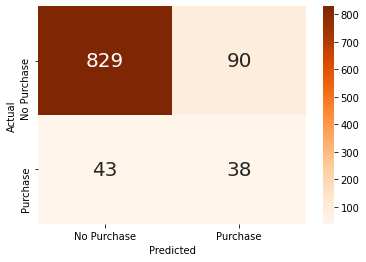

In [29]:
#Confusion matrix
confusion=confusion_matrix(Y2, predtestchanged_class)
sns.heatmap(confusion,annot=True,fmt=".0f",annot_kws={"size":20},cmap=("Oranges"),
                                                      
           xticklabels=["No Purchase","Purchase"],
           yticklabels=["No Purchase","Purchase"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()